In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
#Read in Data
PriceData = pd.read_csv('../Data/global_food_prices.csv', low_memory=False)
CorruptData = pd.read_csv('../Data/Corruption_Index.csv', low_memory=False)
Categories = pd.read_csv('../Data/FoodTypes.csv', low_memory=False)

In [6]:
#Combine months and years into Date column
PriceData["date"] = pd.to_datetime(PriceData.mp_year.astype(str) + '/' + PriceData.mp_month.astype(str) + '/01')
#Only include chosen countries
PriceData = PriceData[PriceData['adm0_name'].isin(['Sudan', 'Mexico', 'China', 'Iraq', 'Ethiopia'])]
CorruptData = CorruptData[CorruptData['Country'].isin(['Sudan', 'Mexico', 'China', 'Iraq', 'Ethiopia'])]
#Only include Chosen Years
PriceData = PriceData[PriceData["date"].isin(pd.date_range('2013-01-01','2021-01-01'))]
PriceData['date'] = PriceData['date'].dt.year
CorruptData = CorruptData.filter(regex='2013|2014|2015|2016|2017|2018|2019|2020|Country')
#Get only the columns we need
CorruptData = CorruptData.filter(regex='Country|CPI')
#Correct Indexes
CorruptData = CorruptData.reset_index()
#Make header years only
CorruptData = CorruptData.rename(columns = lambda x: x.replace('CPI score ', ''))
CorruptData = CorruptData.rename(columns = lambda x: x.replace('CPI Score ', ''))
CorruptData = CorruptData.rename(columns = lambda x: x.replace(' ', ''))
#Put all values to lower case
PriceData = PriceData.applymap(lambda s: s.lower() if type(s) == str else s)
Categories = Categories.applymap(lambda s: s.lower() if type(s) == str else s)
#Shorten the names of the cm_name
PriceData['cm_name'] = PriceData['cm_name'].str.split(' -').str.get(0)

In [7]:
PriceData

,adm0_id,adm0_name,adm1_id,adm1_name,mkt_id,mkt_name,cm_id,cm_name,cur_id,cur_name,pt_id,pt_name,um_id,um_name,mp_month,mp_year,mp_price,mp_commoditysource,date
417258,52.0,china,907,hebei sheng,2605,sijiazhuang,84,wheat,0.0,cny,14,wholesale,5,kg,1,2014,2.6567,NaN,2014
417259,52.0,china,907,hebei sheng,2605,sijiazhuang,84,wheat,0.0,cny,14,wholesale,5,kg,2,2014,2.6100,NaN,2014
417260,52.0,china,907,hebei sheng,2605,sijiazhuang,84,wheat,0.0,cny,14,wholesale,5,kg,3,2014,2.6160,NaN,2014
417261,52.0,china,907,hebei sheng,2605,sijiazhuang,84,wheat,0.0,cny,14,wholesale,5,kg,4,2014,2.5700,NaN,2014
417262,52.0,china,907,hebei sheng,2605,sijiazhuang,84,wheat,0.0,cny,14,wholesale,5,kg,5,2014,2.5400,NaN,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1709055,40764.0,sudan,40772,red sea,1034,port sudan,135,sorghum (white),0.0,sdg,14,wholesale,17,90 kg,8,2020,6900.0000,NaN,2020
1709056,40764.0,sudan,40772,red sea,1034,port sudan,135,sorghum (white),0.0,sdg,14,wholesale,17,90 kg,9,2020,6725.0000,NaN,2020
1709057,40764.0,sudan,40772,red sea,1034,port sudan,135,sorghum (white),0.0,sdg,14,wholesale,17,90 kg,10,2020,6725.0000,NaN,2020
1709058,40764.0,sudan,40772,red sea,1034,port sudan,135,sorghum (white),0.0,sdg,14,wholesale,17,90 kg,11,2020,7700.0000,NaN,2020


In [8]:
CorruptData
columns = ['index', 'country', 'date', 'inflation_score']

corruptTransform = pd.DataFrame({'index': pd.Series(dtype='str'),
                   'date': pd.Series(dtype='str'),
                   'inflation_score': pd.Series(dtype='float')})

#df2 = {'Name': 'Amy', 'Maths': 89, 'Science': 93}
#df = df.append(df2, ignore_index = True)

for index, row in CorruptData.iterrows():
    ctRow20 = {'index': row['index'], 'Country': row['Country'], 'date': '2020', 'inflation_score': row['2020']}
    ctRow19 = {'index': row['index'], 'Country': row['Country'], 'date': '2019', 'inflation_score': row['2019']}
    ctRow18 = {'index': row['index'], 'Country': row['Country'], 'date': '2018', 'inflation_score': row['2018']}
    ctRow17 = {'index': row['index'], 'Country': row['Country'], 'date': '2017', 'inflation_score': row['2017']}
    ctRow16 = {'index': row['index'], 'Country': row['Country'], 'date': '2016', 'inflation_score': row['2016']}
    ctRow15 = {'index': row['index'], 'Country': row['Country'], 'date': '2015', 'inflation_score': row['2015']}
    ctRow14 = {'index': row['index'], 'Country': row['Country'], 'date': '2014', 'inflation_score': row['2014']}
    ctRow13 = {'index': row['index'], 'Country': row['Country'], 'date': '2013', 'inflation_score': row['2013']}
    corruptTransform = corruptTransform.append(ctRow20, ignore_index = True)
    corruptTransform = corruptTransform.append(ctRow19, ignore_index = True)
    corruptTransform = corruptTransform.append(ctRow18, ignore_index = True)
    corruptTransform = corruptTransform.append(ctRow17, ignore_index = True)
    corruptTransform = corruptTransform.append(ctRow16, ignore_index = True)
    corruptTransform = corruptTransform.append(ctRow15, ignore_index = True)
    corruptTransform = corruptTransform.append(ctRow14, ignore_index = True)
    corruptTransform = corruptTransform.append(ctRow13, ignore_index = True)
    
def findPrice1(row):
    nextYear = int(row['date']) + 1
    matchMax = np.where((corruptTransform['Country'] == row['Country']) & (corruptTransform['date'].astype(str) == str(nextYear)))
    percentChangeMaxYear = 0
    if matchMax[0].size > 0:
        rowFinds = corruptTransform.loc[matchMax].reset_index()
        rowFind = rowFinds.iloc[0]
        percentChangeMaxYear = (((rowFind['inflation_score'] - row['inflation_score']) / rowFind['inflation_score']) * 100)
    return percentChangeMaxYear
corruptTransform['Year_Base_to_Next_Price_Change_%'] = corruptTransform.apply(lambda x: findPrice1(x), axis = 1)
    
corruptTransform

/tmp/ipykernel_32978/3424407003.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  corruptTransform = corruptTransform.append(ctRow20, ignore_index = True)
/tmp/ipykernel_32978/3424407003.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  corruptTransform = corruptTransform.append(ctRow19, ignore_index = True)
/tmp/ipykernel_32978/3424407003.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  corruptTransform = corruptTransform.append(ctRow18, ignore_index = True)
/tmp/ipykernel_32978/3424407003.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  corruptTransform = corruptTransform.append(ctRow17, ignore_index = True)
/tmp/ipykern

,index,date,inflation_score,Country,Year_Base_to_Next_Price_Change_%
0,79,2020,42.0,China,0.000000
1,79,2019,41.0,China,2.380952
2,79,2018,39.0,China,4.878049
3,79,2017,41.0,China,-5.128205
4,79,2016,40.0,China,2.439024
5,79,2015,37.0,China,7.500000
6,79,2014,36.0,China,2.702703
7,79,2013,40.0,China,-11.111111
8,94,2020,38.0,Ethiopia,0.000000
9,94,2019,37.0,Ethiopia,2.631579


In [9]:
#lets group so we have country, year, item
res = {'mp_price': 'first'}
itemsGrouped = PriceData.groupby(['adm0_name','cm_name','date']).agg(res).reset_index()
minMax = PriceData.groupby(['adm0_name','cm_name']).agg({'date': ['min','max']})
minMax.columns = minMax.columns.droplevel()
merged = pd.merge(itemsGrouped,minMax,  how='outer', left_on=['adm0_name','cm_name'], right_on = ['adm0_name','cm_name'])

def findPrice(row):
    nextYear = row['date'] + 1
    matchMax = np.where((merged['adm0_name'] == row['adm0_name']) & (merged['cm_name'] == row['cm_name']) & (merged['date'].astype(str) == str(nextYear)))
    percentChangeMaxYear = 0
    if matchMax[0].size > 0:
        rowFinds = merged.loc[matchMax].reset_index()
        rowFind = rowFinds.iloc[0]
        percentChangeMaxYear = (((rowFind['mp_price'] - row['mp_price']) / rowFind['mp_price']) * 100)
    return percentChangeMaxYear
merged['Year_Base_to_Next_Price_Change_%'] = merged.apply(lambda x: findPrice(x), axis = 1)


In [10]:
#we are done with our particular prices dataset. we can now analyze year by year increases for any item
merged

,adm0_name,cm_name,date,mp_price,min,max,Year_Base_to_Next_Price_Change_%
0,china,maize,2014,2.1700,2014,2020,0.458716
1,china,maize,2015,2.1800,2014,2020,-16.341125
2,china,maize,2016,1.8738,2014,2020,-42.494297
3,china,maize,2017,1.3150,2014,2020,21.257485
4,china,maize,2018,1.6700,2014,2020,1.376011
...,...,...,...,...,...,...,...
590,sudan,wheat,2017,490.0000,2013,2021,51.000000
591,sudan,wheat,2018,1000.0000,2013,2021,51.923077
592,sudan,wheat,2019,2080.0000,2013,2021,34.384858
593,sudan,wheat,2020,3170.0000,2013,2021,66.631579


In [11]:
#lets aggregate to see the average % increase across all items per country per year
perCountryPerYearAverage = merged.groupby(['adm0_name', 'date'], as_index=False)['Year_Base_to_Next_Price_Change_%'].mean()
perCountryPerYearAverage.reset_index()
perCountryPerYearAverage

,adm0_name,date,Year_Base_to_Next_Price_Change_%
0,china,2014,0.358488
1,china,2015,-3.978180
2,china,2016,-4.356568
3,china,2017,4.207286
4,china,2018,-0.419262
5,china,2019,-5.870952
6,china,2020,0.000000
7,ethiopia,2013,0.569739
8,ethiopia,2014,1.282581
9,ethiopia,2015,1.427620


<AxesSubplot:title={'center':'Ethiopia'}, xlabel='Year', ylabel='%Inflation Change'>

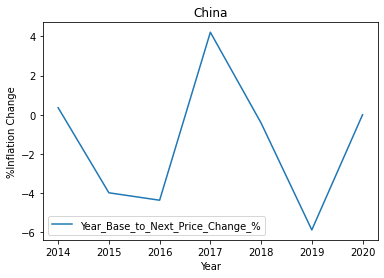

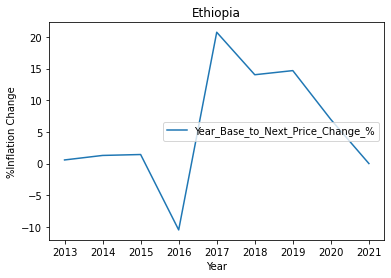

In [12]:
#time to plot
chinaDS = np.where((perCountryPerYearAverage['adm0_name'] == 'china'))
chinaRows= perCountryPerYearAverage.loc[chinaDS].reset_index()
chinaPlot = chinaRows.plot(x='date', y='Year_Base_to_Next_Price_Change_%', title = 'China', legend='False')
chinaPlot.set_xlabel("Year")
chinaPlot.set_ylabel("%Inflation Change")
chinaPlot
ethDS = np.where((perCountryPerYearAverage['adm0_name'] == 'ethiopia'))
ethRows= perCountryPerYearAverage.loc[ethDS].reset_index()
ethPlot = ethRows.plot(x='date', y='Year_Base_to_Next_Price_Change_%', title = 'Ethiopia', legend='False')
ethPlot.set_xlabel("Year")
ethPlot.set_ylabel("%Inflation Change")
ethPlot

In [13]:
%history

#Read in Data
PriceData = pd.read_csv('../Data/global_food_prices.csv', low_memory=False)
CorruptData = pd.read_csv('../Data/Corruption_Index.csv', low_memory=False)
Categories = pd.read_csv('../Data/FoodTypes.csv', low_memory=False)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#Read in Data
PriceData = pd.read_csv('../Data/global_food_prices.csv', low_memory=False)
CorruptData = pd.read_csv('../Data/Corruption_Index.csv', low_memory=False)
Categories = pd.read_csv('../Data/FoodTypes.csv', low_memory=False)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#Read in Data
PriceData = pd.read_csv('../Data/global_food_prices.csv', low_memory=False)
CorruptData = pd.read_csv('../Data/Corruption_Index.csv', low_memory=False)
Categories = pd.read_csv('../Data/FoodTypes.csv', low_memory=False)
#Combine months and years into Date column
PriceData["date"] = pd.to_datetime(PriceData.mp_year.astype(str) + '/' + Pr